In [1]:
setwd('/import/DB/zhang//data')

library(Seurat)

Warning message:
"package 'Seurat' was built under R version 4.2.3"
The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



In [6]:
daa = readRDS('./OS.add.copykat.rds')

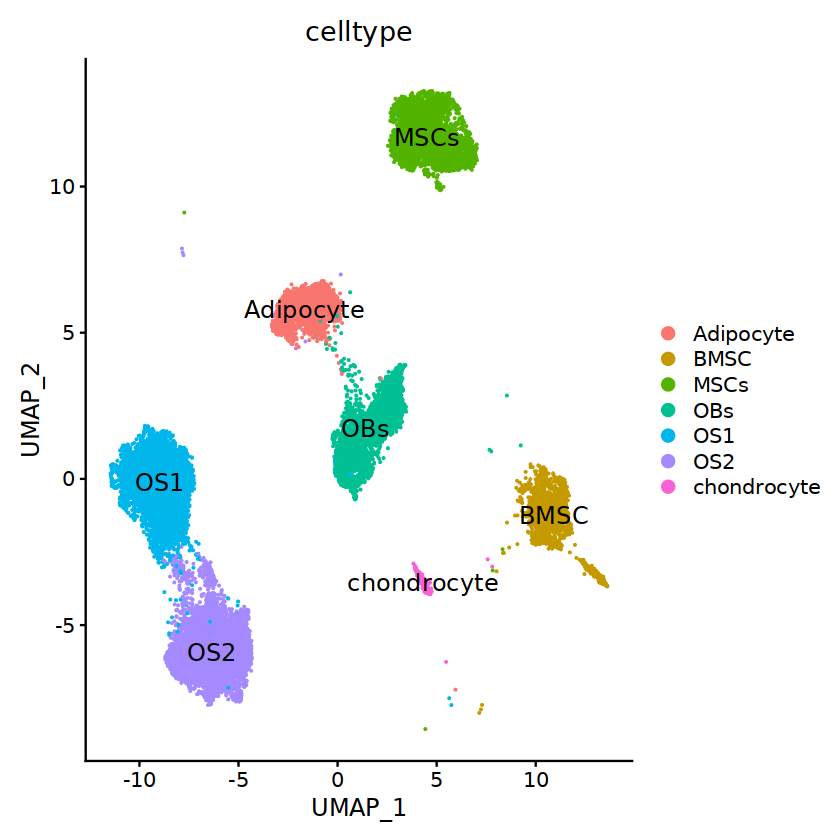

An object of class Seurat 
20168 features across 2909 samples within 1 assay 
Active assay: RNA (20168 features, 0 variable features)

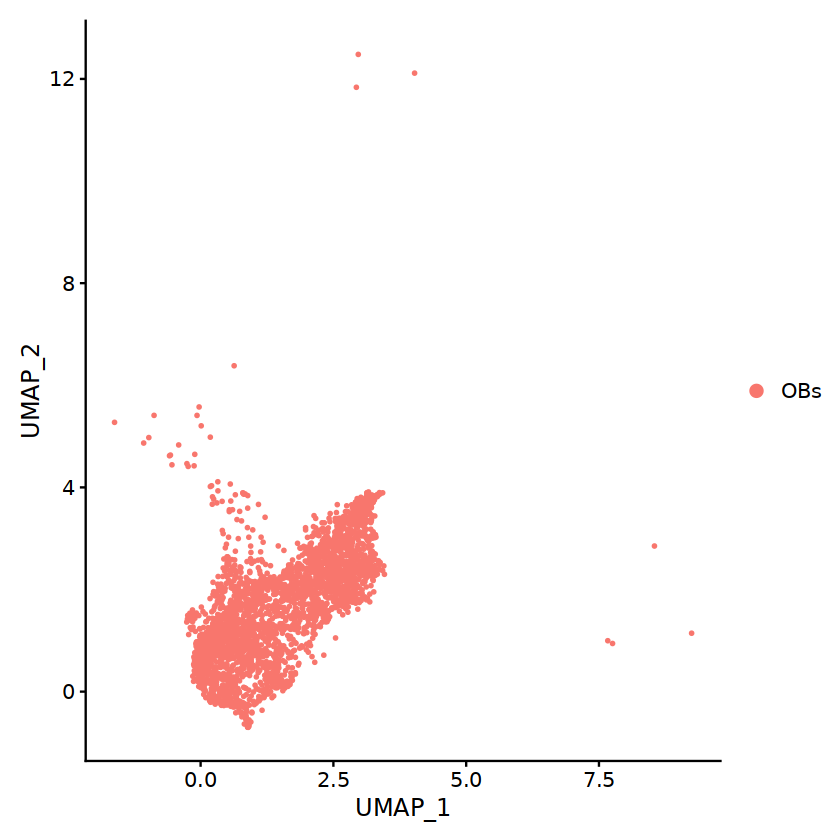

In [7]:
DefaultAssay(daa) = 'RNA'
library(Seurat)
Idents(daa) = 'celltype'
DimPlot(daa, group.by="celltype", label=T, label.size=5, reduction='umap')
OS = subset(daa,celltype =='OBs')
DimPlot(OS)
mca2=CreateSeuratObject(OS@assays$RNA@data,assay = "RNA",min.cells =5 ,meta.data = OS@meta.data)
immune.combined = mca2
immune.combined

In [9]:
table(immune.combined$copykat.tumor.pred)


         normal tumor cluster 1 tumor cluster 2 tumor cluster 3 
           1516             110             647             635 